In [64]:
pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io

In [66]:
#loading the dataset
#df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
data = pd.read_csv('/content/sample_data/train.csv')
print(data)

                                                 Sloka              Class
0    यस्मात् त्रस्यन्ति भूतानि मृगव्याधान्मृगा इव। ...  Vidur Niti Slokas
1    एतान्यनिगृहीतानि  व्यापादयितुमप्यलम्।         ...  Vidur Niti Slokas
2     यावत्स्वस्थो ह्यय देहः तावन्मृत्युश्च दूरतः। ...    Chanakya Slokas
3     ईश्वरस्य  स्मरणं प्रभाते उत्थाय अवश्यं  कर्तं...    sanskrit-slogan
4     लोकयात्रा भयं लज्जा दाक्षिण्यं त्यागशीलता।   ...    Chanakya Slokas
..                                                 ...                ...
378  सुखं च दुःखं च भवाभवौ च लाभालाभौ मरणं जीवितं च...  Vidur Niti Slokas
379   नात्यन्तं सरलेन भाव्यं गत्वा पश्य वनस्थलीम्। ...    Chanakya Slokas
380  ब्राह्मणं ब्राह्मणो वेद भर्ता वेद स्त्रियं तथा...  Vidur Niti Slokas
381   जले तैलं खले गुह्यं पात्रे दानं मनागपि ।     ...    Chanakya Slokas
382                             शोकः शौर्यपकर्षणः ॥       sanskrit-slogan

[383 rows x 2 columns]


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [68]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [69]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/sample_data/train.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 383 rows and 2 columns


In [70]:
#Generating top 2 percentile list
import re
import numpy as np
#vocab = {}
corpus = ""
f = open("/content/sample_data/sans_corpus1.txt", "r")
for x in f:
  corpus+= x

#Removing stop words
clean_corpus=re.sub(r"[.,/()@<=_>।]",'',corpus)
clean_corpus = clean_corpus.split()
vocab = {}
for word in clean_corpus:
  if word in vocab:
    vocab[word]+=1
  else:
    vocab[word]=1
print(vocab)
freqs = np.array(list(vocab.values()))
percentile_val = np.percentile(freqs, 97)

#Identifying and Storing Stopwords
stopwords = list()
for i in vocab.keys():
    if vocab[i] > percentile_val:
        stopwords.append(i)
print(stopwords)

{'कदाचित्': 3, 'एकः': 11, 'हरः': 5, 'कूर्मः': 5, 'च': 21, 'एकस्मिन्': 1, 'वने': 5, 'निवसति': 3, 'स्म': 20, 'तस्य': 4, 'द्रुतवेगेन': 1, 'खरः': 1, 'अतीव': 10, 'गर्वितः': 1, 'आसीत्': 16, 'सः': 17, 'कूर्मस्य': 1, 'मन्दवेगस्य': 1, 'कृते': 2, 'उपहासं': 1, 'कृतवान्': 6, 'खरं': 1, 'सह': 2, 'दौडं': 2, 'कर्तुं': 4, 'आह्वानं': 1, 'आव्हानं': 1, 'स्वीकृतवान्': 1, 'दौडः': 1, 'आरब्धः': 1, 'काकः': 1, 'रेफरी': 1, 'द्रुतं': 2, 'धावितवान्': 4, 'दूरं': 1, 'पृष्ठतः': 2, 'एव': 3, 'त्यक्तः': 1, 'एकस्य': 1, 'वृक्षस्य': 1, 'अधः': 3, 'विश्रामं': 1, 'स्थगितवान्': 1, 'निद्रां': 1, 'गतः': 2, 'तम्': 1, 'अतिक्रम्य': 3, 'विजयस्तं': 1, 'प्राप्तवान्': 1, 'जागृत्य': 1, 'यथाशक्ति': 1, 'शीघ्रं': 3, 'दृष्टवान्': 1, 'यत्': 15, 'पूर्वमेव': 1, 'विजयस्तम्भे': 1, 'अस्ति': 5, 'जित्वा': 1, 'अभवत्': 3, 'Oन्चे': 1, 'अ': 4, 'ःअरे': 1, 'अन्द्': 3, 'तोर्तोइसे': 6, 'लिवेद्': 1, 'इन्': 1, 'फ़ोरेस्त्ठे': 1, 'हरे': 6, 'वस्': 4, 'वेर्य्': 2, 'प्रोउद्': 1, 'ओफ़्': 2, 'हिस्': 2, 'फ़स्त्': 2, 'स्पीद्ःए': 1, 'मदे': 1, 'फ़ुन्': 1, 'थे': 8, 'फ़ोर्': 

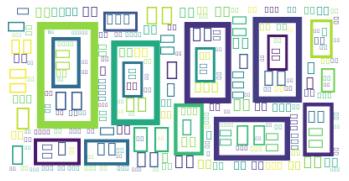

(-0.5, 499.5, 499.5, -0.5)

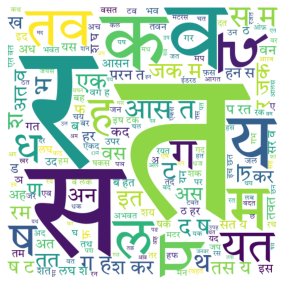

In [71]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset
df = pd.read_csv("/content/sample_data/android-games.csv")
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable
text = corpus
# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(font_path= '/content/sample_data/TiroDevanagariSanskrit-Regular.ttf',width = 500, height = 500,background_color = 'white', stopwords = stopwords,min_font_size = 10).generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

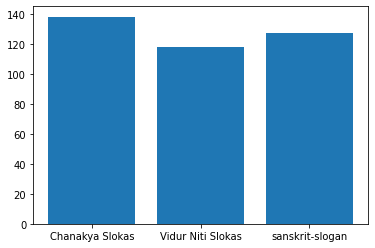

In [72]:
Class = data['Class'].value_counts()
names = ['Chanakya Slokas','Vidur Niti Slokas','sanskrit-slogan']
values = [Class['Chanakya Slokas'],Class['Vidur Niti Slokas'],Class['sanskrit-slogan']]

plt.bar(range(len(values)), values, tick_label=names)
plt.show()

In [63]:
pip install inltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 355 kB 5.2 MB/s 
     |████████████████████████████████| 233 kB 56.3 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 1.3 MB 58.2 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=487471ab818bdbe495d8e89e2909ea1f6ccce000670070189bdf7b7f19cd9d59
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=e7d9438d1b64f804d49b6be4d72ac1aadcd328de0d5ee87fb752d2089cd1cfc7
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built nvidia-ml-py3 typing
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.9
    Uninstalling fastai

In [105]:
from inltk.inltk import *

In [106]:
setup('sa')

Done!


RuntimeError: ignored

In [110]:
identify_language('कदाचित् एकः हरः कूर्मः च एकस्मिन् वने निवसति स्म ')
#predict_next_words('कदाचित् एकः हरः कूर्मः च एकस्मिन् वने निवसति स्म ',10,'sa')

We'll only do this for the first time.
We'll only do this for the first time.


RuntimeError: ignored

In [90]:
from inltk.inltk import tokenize
tokenize(corpus,'sa')

['▁कदाचित्',
 '▁एकः',
 '▁हर',
 'ः',
 '▁कूर्म',
 'ः',
 '▁च',
 '▁एकस्मिन्',
 '▁वने',
 '▁निवसति',
 '▁स्म',
 '▁।',
 '▁तस्य',
 '▁',
 'द्रुत',
 'वेग',
 'ेन',
 '▁खर',
 'ः',
 '▁अतीव',
 '▁गर्व',
 'ितः',
 '▁आसीत्',
 '▁।',
 '▁सः',
 '▁कूर्म',
 'स्य',
 '▁मन्द',
 'वेग',
 'स्य',
 '▁कृते',
 '▁उपहास',
 'ं',
 '▁कृतवान्',
 '▁।',
 '▁कूर्म',
 'ः',
 '▁खर',
 'ं',
 '▁तस्य',
 '▁सह',
 '▁',
 'दौ',
 'ड',
 'ं',
 '▁कर्तुं',
 '▁आह्वान',
 'ं',
 '▁कृतवान्',
 '▁।',
 '▁हर',
 'ः',
 '▁आव',
 '्',
 'हान',
 'ं',
 '▁स्वीकृतवान्',
 '▁।',
 '▁',
 'दौ',
 'ड',
 'ः',
 '▁आरब्धः',
 '▁।',
 '▁काक',
 'ः',
 '▁रे',
 'फ',
 'री',
 '▁आसीत्',
 '▁।',
 '▁हर',
 'ः',
 '▁अतीव',
 '▁',
 'द्रुत',
 'ं',
 '▁धाव',
 'ितवान्',
 '।',
 '▁कूर्म',
 'ः',
 '▁दूरं',
 '▁पृष्ठत',
 'ः',
 '▁एव',
 '▁त्यक्त',
 'ः',
 '▁आसीत्',
 '▁।',
 '▁हर',
 'ः',
 '▁एकस्य',
 '▁वृक्षस्य',
 '▁अधः',
 '▁विश्राम',
 'ं',
 '▁कर्तुं',
 '▁स्थगित',
 'वान्',
 '।',
 '▁सः',
 '▁निद्रा',
 'ं',
 '▁गतः',
 '।',
 '▁तम्',
 '▁अ',
 'तिक्रम्य',
 '▁कूर्म',
 'ः',
 '▁विजय',
 'स्त',
 'ं',
 '▁प्राप्तवान्',
 '▁।'